In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import visual_genome.local as vg

VG_DATA_PATH = './data/visual-genome'

# load vg image info and region description
all_image_data = vg.get_all_image_data(data_dir=VG_DATA_PATH)
all_region_descriptions = vg.get_all_region_descriptions(data_dir=VG_DATA_PATH)

In [3]:
print('vg data size {}'.format(len(all_image_data)))
print('-----------------')
print('[all_image_data] type {}'.format(type(all_image_data[0])))
print('example')
print(all_image_data[0])
print('-----------------')
print('[all_region_descriptions] list of type {}'.format(type(all_region_descriptions[0][0])))
print('example')
print(all_region_descriptions[0])

vg data size 108077
-----------------
[all_image_data] type <class 'visual_genome.models.Image'>
example
id: 1, coco_id: -1, flickr_id: -1, width: 800, url: https://cs.stanford.edu/people/rak248/VG_100K_2/1.jpg
-----------------
[all_region_descriptions] list of type <class 'visual_genome.models.Region'>
example
[id: 1382, x: 421, y: 57, width: 82,height: 139, phrase: the clock is green in colour, image: 1, id: 1383, x: 194, y: 372, width: 182,height: 109, phrase: shade is along the street , image: 1, id: 1384, x: 241, y: 491, width: 61,height: 30, phrase: man is wearing sneakers, image: 1, id: 1385, x: 617, y: 377, width: 36,height: 36, phrase: cars headlights are off, image: 1, id: 1386, x: 322, y: 298, width: 41,height: 49, phrase: bikes are parked at the far edge, image: 1, id: 1432, x: 122, y: 14, width: 84,height: 178, phrase: A sign on the facade of the building, image: 1, id: 1433, x: 624, y: 236, width: 96,height: 332, phrase: A tree trunk on the sidewalk, image: 1, id: 1434, 

### Visualizing ground truth regions

In [4]:
import os
import re

def vg_url_to_file_path(vg_data_path, url):
    
    res = re.search('(VG.*)/(.*.jpg)$', url)
    return os.path.join(vg_data_path, res.group(1), res.group(2))

In [5]:
vg_url_to_file_path(VG_DATA_PATH, all_image_data[2].url)

'./data/visual-genome/VG_100K/3.jpg'

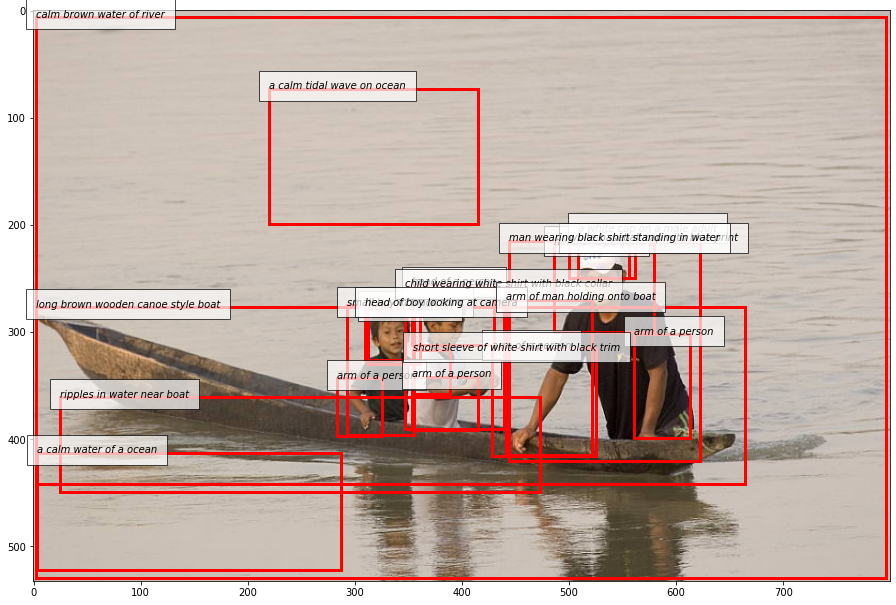

In [34]:
# Ref: https://github.com/ranjaykrishna/visual_genome_python_driver/blob/master/region_visualization_demo.ipynb

import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Rectangle

def visualize_regions(image_file_path, regions):
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)

    img = Image.open(image_file_path)
    plt.imshow(img)
    ax = plt.gca()
    for region in regions:
        ax.add_patch(Rectangle((region.x, region.y),
                               region.width,
                               region.height,
                               fill=False,
                               edgecolor='red',
                               linewidth=3))
        ax.text(region.x, region.y, region.phrase, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
    fig = plt.gcf()
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.show()

IMG_NAME = 51
img_idx = IMG_NAME - 1

image_file_path = vg_url_to_file_path(VG_DATA_PATH, all_image_data[img_idx].url)
regions = all_region_descriptions[img_idx]

visualize_regions(image_file_path, regions[:20])

### Visualizing regions

In [35]:
! python describe.py --help

usage: describe.py [-h] [--config_json CONFIG_JSON] [--lut_path LUT_PATH]
                   [--model_checkpoint MODEL_CHECKPOINT] [--img_path IMG_PATH]
                   [--result_dir RESULT_DIR] [--batch_size BATCH_SIZE] [--cpu]
                   [--verbose]

Do dense captioning

optional arguments:
  -h, --help            show this help message and exit
  --config_json CONFIG_JSON
                        path of the json file which stored model configuration
  --lut_path LUT_PATH   look up table path
  --model_checkpoint MODEL_CHECKPOINT
                        path of the trained model checkpoint
  --img_path IMG_PATH   path of images, should be a file or a directory with
                        only images
  --result_dir RESULT_DIR
                        path of the directory to save the output file
  --batch_size BATCH_SIZE
                        useful when img_path is a directory
  --cpu                 whether use cpu to compute
  --verbose             whether output info


In [36]:
# 使用脚本
! python describe.py --config_json './model_params/merge_bs_2/config.json' \
  --model_checkpoint './model_params/merge_bs_2.pth.tar' \
  --img_path './image_to_describe' \
  --result_dir '.' \
  --batch_size 2 --verbose

[INFO]: checkpoint ./model_params/merge_bs_2.pth.tar loaded
[INFO]: correspond performance on val set:
        map: 0.086
        detmap: 0.264
100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.65it/s]
[Result] ==== ./image_to_describe/2356897.jpg =====
        SCORE 0.98  BOX [77.65, 15.59, 437.96, 348.04]
        CAP below utencils pooled modern

        SCORE 0.93  BOX [9.71, 273.29, 495.45, 371.39]
        CAP thee tables sufboard airline lying games

        SCORE 0.92  BOX [252.5, 202.44, 326.07, 289.12]
        CAP thee brewers sufboard ton

        SCORE 0.92  BOX [2.31, 131.97, 88.8, 268.48]
        CAP below sandy mix situated

        SCORE 0.91  BOX [162.37, 37.77, 316.62, 312.9]
        CAP below brewers caddy races brewers

        SCORE 0.9  BOX [21.23, 335.12, 97.95, 366.75]
        CAP below grabs peper

        SCORE 0.84  BOX [12.98, 161.64, 479.42, 358.54]
        CAP below tourists vacation fighter

        SCORE 0.81  BOX [81.71, 40.02, 190.

In [40]:
import json

RESULT_JSON_PATH = './result.json'
with open(RESULT_JSON_PATH, 'r') as f:
    results = json.load(f)

for file_path in results.keys():
    print(file_path)

./image_to_describe/2356897.jpg
./image_to_describe/2396478.jpg
./image_to_describe/2401512.jpg
./image_to_describe/2364956.jpg
./image_to_describe/2357356.jpg
./image_to_describe/51.jpg
./image_to_describe/59.jpg


In [41]:
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Rectangle

def visualize_result(image_file_path, result):

    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)

    assert isinstance(result, list)

    img = Image.open(image_file_path)
    plt.imshow(img)
    ax = plt.gca()
    for r in result:
        ax.add_patch(Rectangle((r['box'][0], r['box'][1]),
                               r['box'][2]-r['box'][0],
                               r['box'][3]-r['box'][1],
                               fill=False,
                               edgecolor='red',
                               linewidth=3))
        ax.text(r['box'][0], r['box'][1], r['cap'], style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
    fig = plt.gcf()
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.show()

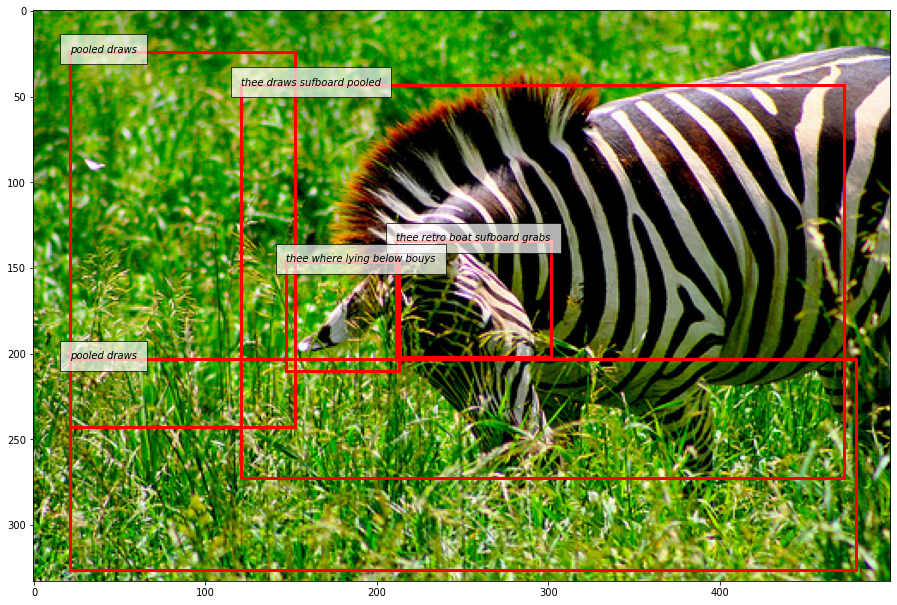

In [52]:
IMG_FILE_PATH = './image_to_describe/2396478.jpg'
TO_K = 5

assert IMG_FILE_PATH in results.keys()

visualize_result(IMG_FILE_PATH, results[IMG_FILE_PATH][:TO_K])